In [1]:
# imports needed for SQL Challenge
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

from config import g
from sqlalchemy import create_engine

In [2]:
# Connect to PostgreSQL
connection = psycopg2.connect(host="localhost", port = 5432, database="sql-challenge", user="postgres", password = g)
print('Python connected to PostgreSQL!')

Python connected to PostgreSQL!


In [3]:
# Import the Salaries table
salaries_df = pd.read_sql('select * from salaries', connection)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


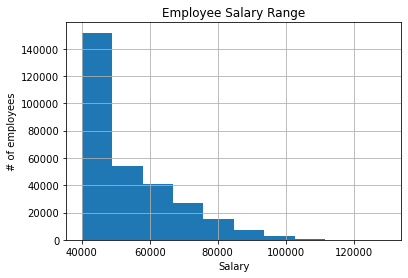

In [4]:
salaries_df.hist(column='salary')
plt.title("Employee Salary Range", loc= 'center')
plt.ylabel("# of employees")
plt.xlabel("Salary")
plt.show()

In [5]:
#Import the Employees table
employees_df = pd.read_sql('select * from employees', connection)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
# Import the title table
titles_df = pd.read_sql('select * from titles', connection)
titles_df.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# Merge Employee and Title File together
employees_titles_df = titles_df.merge(employees_df, on='emp_title_id')
employees_titles_df.head()

,emp_title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,1964-01-19,Venkatesan,Gilg,M,1993-06-28


In [8]:
# Merge Employee_Title file with salaries
employees_titles_salaries_df = salaries_df.merge(employees_titles_df, on="emp_no")
employees_titles_salaries_df.head()

,emp_no,salary,emp_title_id,title,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,Senior Engineer,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,Staff,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,Senior Engineer,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,Senior Engineer,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,Staff,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [9]:
# Create Group by title with average salary
avg_salary = employees_titles_salaries_df.groupby("title")["salary"].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

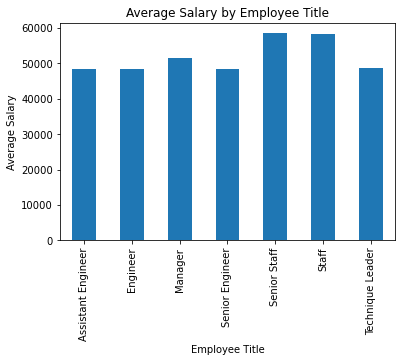

In [12]:
# Create Bar Chart of average salary by title
avg_salary.plot.bar()
plt.title("Average Salary by Employee Title", loc= 'center')
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.show()